<a href="https://colab.research.google.com/github/ErickNicolasP/ASE/blob/main/proyecto_ASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAMOS TODOS LOS DATOS NECESARIOS, BIBLIOTECAS Y ACOMODAMOS LA INFORMACIÓN PARA SU PROXIMA MANIPULACIÓN

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [152]:
#Cargamos el archivo desde google drive
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [153]:
#importamos las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import io as io
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [154]:
#cargamos los data frame en las variables
#2018
dev_2018 = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2018/DEV 2018.csv')
#2019
dev_2019 = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2019/DEV 2019.csv')
#2020
dev_2020_enero = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2020/DEV 2020_enero-marzo.csv')
dev_2020_julio = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2020/DEV 2020_julio-septiembre.csv')
dev_2020_octubre = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2020/DEV 2020_octubre-diciembre.csv')
#2022
dev_2022_julio = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2022/DEV Julio-Septiembre 2022.csv')
dev_2022_octubre = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2022/DEV Octubre-Diciembre 2022.csv')

#poblacion 2020, esta se usará de referencia para sacar la tasa_2018, ya que el censo se hace cada 10 años, el más acertado es el de 2020
censo = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/censo 2020/censo 2020.csv')

<ipython-input-154-fde523059dcc>:3: DtypeWarning: Columns (496,497) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_2018 = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2018/DEV 2018.csv')
<ipython-input-154-fde523059dcc>:5: DtypeWarning: Columns (494,496) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_2019 = pd.read_csv('/content/gdrive/MyDrive/Ciencia de Datos/ASE/2019/DEV 2019.csv')


In [155]:
#Los años 2020 y 2022, no tienen los data frame concatenados, por lo que eso se hará acontinuación
#2020
dev_2020 = pd.concat([dev_2020_enero,dev_2020_julio,dev_2020_octubre], axis=0)
#2022
dev_2022 = pd.concat([dev_2022_julio,dev_2022_octubre],axis=0)
#se modifican las escolaridades para que sea más fácil analizar
dev_2020["a3_1_1n"] = dev_2020["a3_1_1n"].replace({6:5,7:6,8:6,9:7,10:8,11:9})
dev_2022["a3_1_1n"] = dev_2022["a3_1_1n"].replace({6:5,7:6,8:6,9:7,10:8,11:9})
#variables de los data frames
#----dev_2018
#----dev_2019
#----dev_2020
#----dev_2022



#EDAD Y EL SEXO CON SU TASA DE MIGRACIÓN. 2018


In [156]:
#Los valores de los devueltos del 2018, toman la edad hasta los 96, pero los valores de 97, 98, 99 son de no especificado, etc.
# por ende estos valores no ayudan a calcular la tasa, también se filtran los valores para solo tomar los hombres y despúes a las mujeres.
# Después se cuentan los valores para contar las personas de cierta edad que han migrado

hombres_df_2018 = dev_2018.loc[(dev_2018["p1"] == 1) & (dev_2018["p2"] < 97), ["p2", "p1"]].value_counts().reset_index()
hombres_df_2018 = hombres_df_2018.loc[:, ["p2", 0]]
hombres_df_2018.columns = ["edad", "contar"]

mujeres_df_2018 = dev_2018.loc[(dev_2018["p1"] == 2) & (dev_2018["p2"] < 97), ["p2", "p1"]].value_counts().reset_index()
mujeres_df_2018 = mujeres_df_2018.loc[:, ["p2", 0]]
mujeres_df_2018.columns = ["edad", "contar"]

In [157]:
#Se toman los valores máximos de las mujeres u hombres, esto es para que los data frames tengan las mismas dimensiones
# se usa el maximo de cualquiera de esos, para asegurar que no se pierden datos
if hombres_df_2018["edad"].max() > mujeres_df_2018["edad"].max() :
    max_2018 = hombres_df_2018["edad"].max()
else:
    max_2018 = mujeres_df_2018["edad"].max()

In [158]:
#Define el rango de edades y las edades presentes en el dataframe hombres_df_2018
rango_edades = set(range(0, max_2018+1))
edades_presentes = set(hombres_df_2018['edad'])
#Encuentra las edades faltantes
edades_faltantes = rango_edades - edades_presentes
#Añade filas para las edades faltantes y establece un valor de 0 para las demás columnas
for edad in edades_faltantes:
    hombres_df_2018.loc[len(hombres_df_2018)] = [edad, 0]
#Ordena el dataframe por edad y reinicia el índice
hombres_df_2018 = hombres_df_2018.sort_values("edad").reset_index(drop=True)

In [159]:
#Define el rango de edades y las edades presentes en el dataframe mujeres_df_2018
rango_edades = set(range(0, max_2018+1))
edades_presentes = set(mujeres_df_2018['edad'])
#Encuentra las edades faltantes
edades_faltantes = rango_edades - edades_presentes
#Añade filas para las edades faltantes y establece un valor de 0 para las demás columnas
for edad in edades_faltantes:
    mujeres_df_2018.loc[len(mujeres_df_2018)] = [edad, 0]
#Ordena el dataframe por edad y reinicia el índice
mujeres_df_2018 = mujeres_df_2018.sort_values("edad").reset_index(drop=True)

In [160]:
# Asignar el conjunto de datos "censo" a una nueva variable llamada "censo_2018"
censo_2018 = censo
# Crear un nuevo objeto de dataframe llamado "tasa_2018" con dos columnas llamadas "hombres" y "mujeres"
tasa_2018 = pd.DataFrame(columns=['hombres', 'mujeres'])
# Eliminar cualquier coma que pueda estar presente en los valores de "censo_2018" y convertir en valores enteros
censo_2018 = censo_2018.replace(',', '', regex=True).astype('int64')
# Seleccionar solo las primeras "max_2018+1" filas de "censo_2018". "max_2018" es una variable que contiene el número máximo de filas que se desean seleccionar.
censo_2018 = censo_2018.iloc[0:max_2018+1]

In [161]:
# Calcular la tasa de hombres dividiendo el número de hombres por el total de la población masculina y multiplicando por 1000
tasa_2018["hombres"] = (hombres_df_2018["contar"]/censo_2018["Hombres"])*1000
# Calcular la tasa de mujeres dividiendo el número de mujeres por el total de la población femenina y multiplicando por 1000
tasa_2018["mujeres"] = (mujeres_df_2018["contar"]/censo_2018["Mujeres"])*1000
# Concatenar la columna "edad" de "hombres_df_2018" con "tasa_2018"
tasa_2018 = pd.concat([tasa_2018, hombres_df_2018["edad"]], axis=1)
# Agregar una nueva columna llamada "año" con el valor 2018 a "tasa_2018"
tasa_2018["año"] = 2018
tasa_2018

,hombres,mujeres,edad,año
0,0.00000,0.000000,0,2018
1,0.00000,0.000000,1,2018
2,0.00000,0.000000,2,2018
3,0.00000,0.000000,3,2018
4,0.00000,0.000000,4,2018
...,...,...,...,...
67,0.00000,0.000000,67,2018
68,0.00000,0.002474,68,2018
69,0.00000,0.000000,69,2018
70,0.00000,0.000000,70,2018


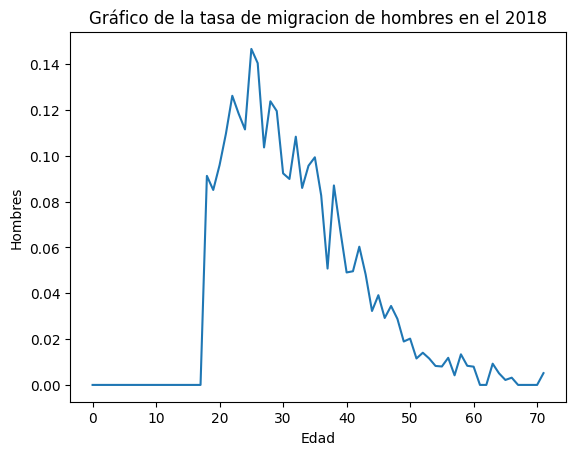

In [162]:
plt.plot(hombres_df_2018['edad'], tasa_2018['hombres'])
plt.xlabel('Edad')
plt.ylabel('Hombres')
plt.title('Gráfico de la tasa de migracion de hombres en el 2018')
plt.show()

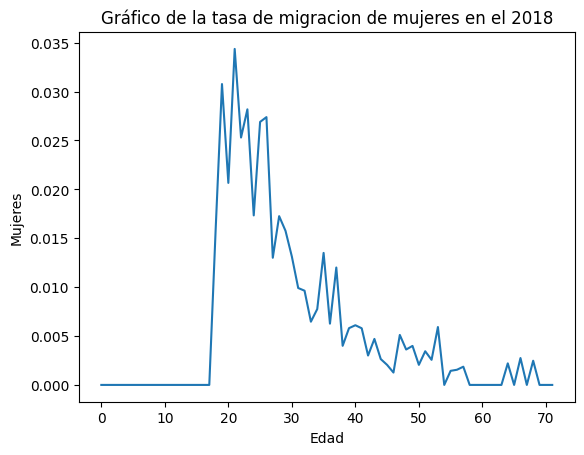

In [163]:
plt.plot(hombres_df_2018['edad'], tasa_2018['mujeres'])
plt.xlabel('Edad')
plt.ylabel('Mujeres')
plt.title('Gráfico de la tasa de migracion de mujeres en el 2018')
plt.show()

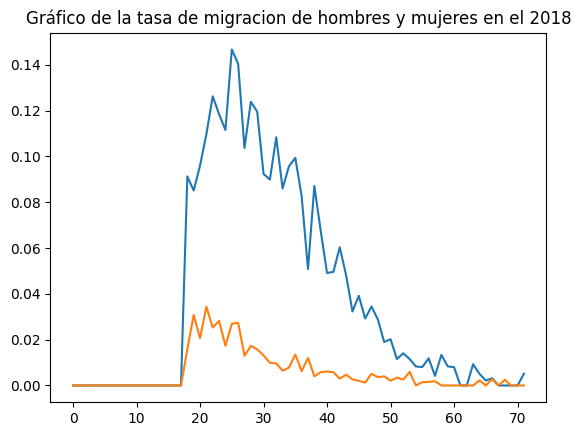

In [164]:
plt.plot(hombres_df_2018['edad'], tasa_2018['hombres'])
plt.plot(hombres_df_2018['edad'], tasa_2018['mujeres'])
plt.title('Gráfico de la tasa de migracion de hombres y mujeres en el 2018')
plt.show()

In [165]:
# Crear un objeto MinMaxScaler llamado "scaler"
scaler = MinMaxScaler()
# Normalizar los valores de "tasa_2018" utilizando el objeto "scaler"
tasa_norm_2018 = scaler.fit_transform(tasa_2018)
# Convertir "tasa_norm_2018" en un nuevo dataframe de pandas con las mismas columnas que "tasa_2018"
tasa_norm_2018 = pd.DataFrame(tasa_norm_2018, columns=tasa_2018.columns)

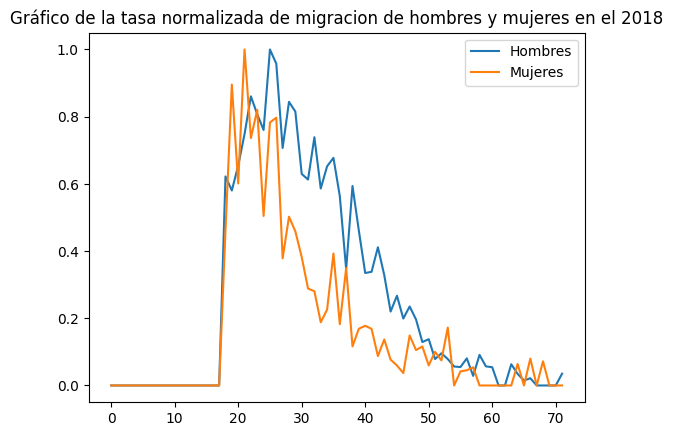

In [166]:
plt.plot(hombres_df_2018['edad'], tasa_norm_2018['hombres'],label="Hombres")
plt.plot(hombres_df_2018['edad'], tasa_norm_2018['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migracion de hombres y mujeres en el 2018')
plt.legend()
plt.show()

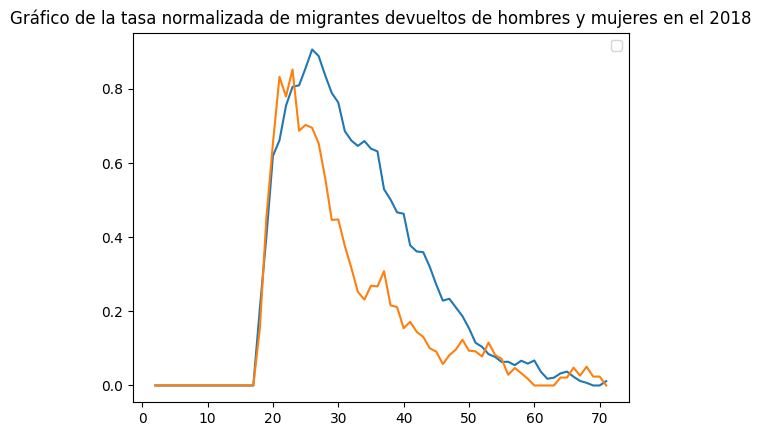

In [167]:
suavizada_hombres = tasa_norm_2018.rolling(window=3).mean()
plt.plot(hombres_df_2018['edad'], suavizada_hombres['hombres'])
suavizada_mujeres = tasa_norm_2018.rolling(window=3).mean()
plt.plot(hombres_df_2018['edad'], suavizada_mujeres['mujeres'])
plt.title('Gráfico de la tasa normalizada de migrantes devueltos de hombres y mujeres en el 2018')
plt.legend()
plt.show()

# EDAD Y SEXO CON SU TASA DE MIGRACIÓN. 2019

In [168]:
# Los pasos hechos en esta parte, es lo mismo que se hizo para el año 2018, sería irrelevante agregar comentarios de la misma forma
# por ende, no serán agregados al menos que algo diferente se haya hecho
hombres_df_2019 = dev_2019.loc[(dev_2019["p1"] == 1) & (dev_2019["p2"] < 97), ["p2", "p1"]].value_counts().reset_index()
hombres_df_2019 = hombres_df_2019.loc[:, ["p2", 0]]
hombres_df_2019.columns = ["edad", "contar"]

mujeres_df_2019 = dev_2019.loc[(dev_2019["p1"] == 2) & (dev_2019["p2"] < 97), ["p2", "p1"]].value_counts().reset_index()
mujeres_df_2019 = mujeres_df_2019.loc[:, ["p2", 0]]
mujeres_df_2019.columns = ["edad", "contar"]

In [169]:
if hombres_df_2019["edad"].max() > mujeres_df_2019["edad"].max() :
    max_2019 = hombres_df_2019["edad"].max()
else:
    max_2019 = mujeres_df_2019["edad"].max()

In [170]:
rango_edades = set(range(0, max_2019+1))
edades_presentes = set(hombres_df_2019['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    hombres_df_2019.loc[len(hombres_df_2019)] = [edad, 0]
hombres_df_2019 = hombres_df_2019.sort_values("edad").reset_index(drop=True)

In [171]:
rango_edades = set(range(0, max_2019+1))
edades_presentes = set(mujeres_df_2019['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    mujeres_df_2019.loc[len(mujeres_df_2019)] = [edad, 0]
mujeres_df_2019 = mujeres_df_2019.sort_values("edad").reset_index(drop=True)

In [172]:
censo_2019 = censo
tasa_2019 = pd.DataFrame(columns=['hombres', 'mujeres'])
censo_2019 = censo_2019.replace(',', '', regex=True).astype('int64')
censo_2019 = censo_2019.iloc[0:max_2019+1]

In [173]:
tasa_2019["hombres"] = (hombres_df_2019["contar"]/censo_2019["Hombres"])*1000
tasa_2019["mujeres"] = (mujeres_df_2019["contar"]/censo_2019["Mujeres"])*1000
tasa_2019 = pd.concat([tasa_2019, hombres_df_2019["edad"]], axis=1)
tasa_2019["año"] = 2019
tasa_2019

,hombres,mujeres,edad,año
0,0.000000,0.0,0,2019
1,0.000000,0.0,1,2019
2,0.000000,0.0,2,2019
3,0.000000,0.0,3,2019
4,0.000000,0.0,4,2019
...,...,...,...,...
71,0.000000,0.0,71,2019
72,0.000000,0.0,72,2019
73,0.000000,0.0,73,2019
74,0.004757,0.0,74,2019


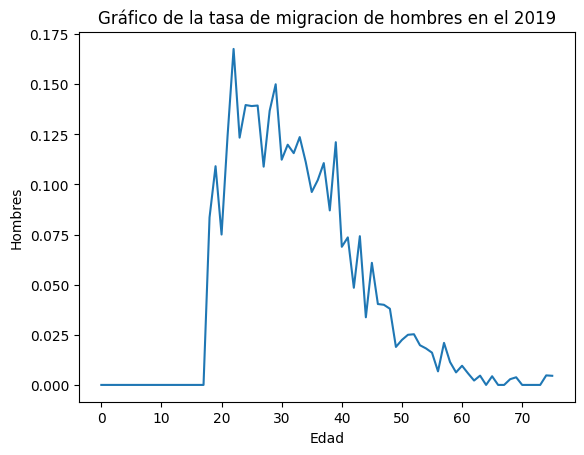

In [174]:
plt.plot(hombres_df_2019['edad'], tasa_2019['hombres'])
plt.xlabel('Edad')
plt.ylabel('Hombres')
plt.title('Gráfico de la tasa de migracion de hombres en el 2019')
plt.show()

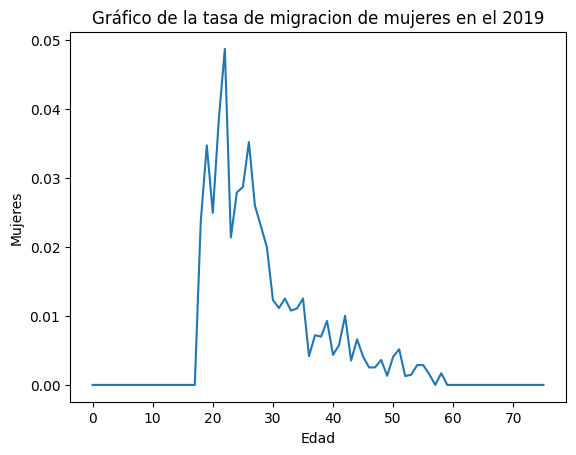

In [175]:
plt.plot(hombres_df_2019['edad'], tasa_2019['mujeres'])
plt.xlabel('Edad')
plt.ylabel('Mujeres')
plt.title('Gráfico de la tasa de migracion de mujeres en el 2019')
plt.show()

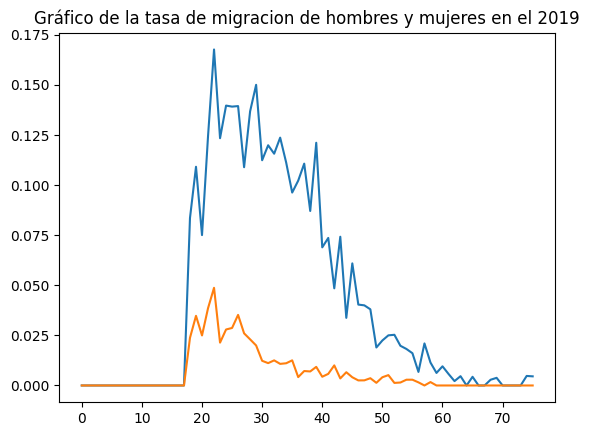

In [176]:
plt.plot(hombres_df_2019['edad'], tasa_2019['hombres'])
plt.plot(hombres_df_2019['edad'], tasa_2019['mujeres'])
plt.title('Gráfico de la tasa de migracion de hombres y mujeres en el 2019')
plt.show()

In [177]:
scaler = MinMaxScaler()
tasa_norm_2019 = scaler.fit_transform(tasa_2019)
tasa_norm_2019 = pd.DataFrame(tasa_norm_2019, columns=tasa_2019.columns)

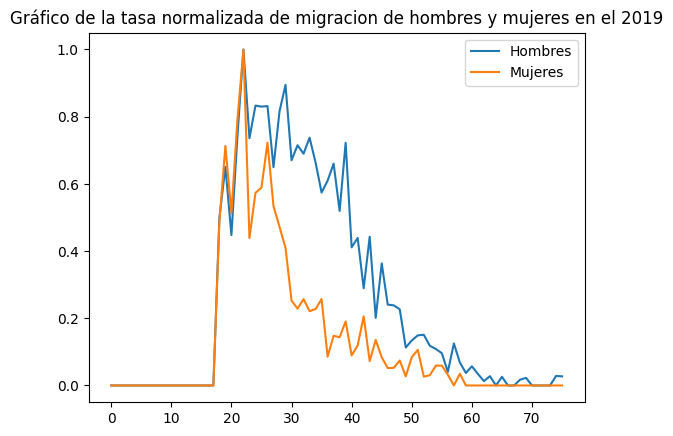

In [178]:
plt.plot(hombres_df_2019['edad'], tasa_norm_2019['hombres'],label="Hombres")
plt.plot(hombres_df_2019['edad'], tasa_norm_2019['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migracion de hombres y mujeres en el 2019')
plt.legend()
plt.show()

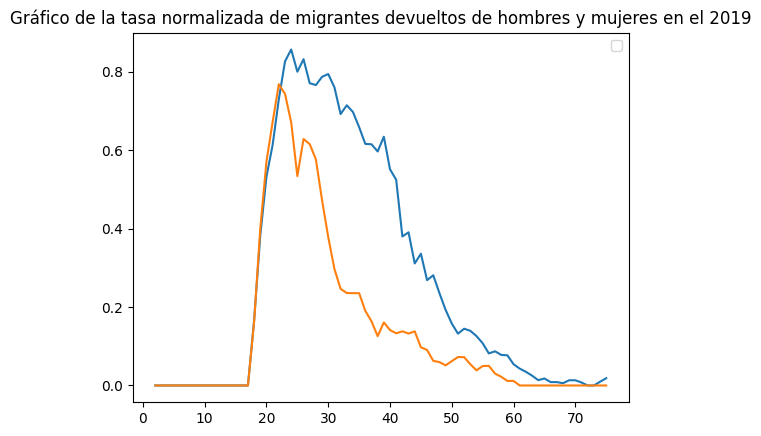

In [179]:
suavizada_hombres = tasa_norm_2019.rolling(window=3).mean()
plt.plot(hombres_df_2019['edad'], suavizada_hombres['hombres'])
suavizada_mujeres = tasa_norm_2019.rolling(window=3).mean()
plt.plot(hombres_df_2019['edad'], suavizada_mujeres['mujeres'])
plt.title('Gráfico de la tasa normalizada de migrantes devueltos de hombres y mujeres en el 2019')
plt.legend()
plt.show()

#EDAD Y SEXO CON SU TASA DE MIGRACIÓN. 2020

In [180]:
# Los pasos hechos en esta parte, es lo mismo que se hizo para el año 2018, sería irrelevante agregar comentarios de la misma forma
# por ende, no serán agregados al menos que algo diferente se haya hecho
hombres_df_2020 = dev_2020.loc[(dev_2020["a1"] == 1) & (dev_2020["a2"] < 97), ["a2", "a1"]].value_counts().reset_index()
hombres_df_2020 = hombres_df_2020.loc[:, ["a2", 0]]
hombres_df_2020.columns = ["edad", "contar"]

mujeres_df_2020 = dev_2020.loc[(dev_2020["a1"] == 2) & (dev_2020["a2"] < 97), ["a2", "a1"]].value_counts().reset_index()
mujeres_df_2020 = mujeres_df_2020.loc[:, ["a2", 0]]
mujeres_df_2020.columns = ["edad", "contar"]

In [181]:
if hombres_df_2020["edad"].max() > mujeres_df_2020["edad"].max() :
    max_2020 = hombres_df_2020["edad"].max()
else:
    max_2020 = mujeres_df_2020["edad"].max()

In [182]:
rango_edades = set(range(0, max_2020+1))
edades_presentes = set(hombres_df_2020['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    hombres_df_2020.loc[len(hombres_df_2020)] = [edad, 0]
hombres_df_2020 = hombres_df_2020.sort_values("edad").reset_index(drop=True)

In [183]:
rango_edades = set(range(0, max_2020+1))
edades_presentes = set(mujeres_df_2020['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    mujeres_df_2020.loc[len(mujeres_df_2020)] = [edad, 0]
mujeres_df_2020 = mujeres_df_2020.sort_values("edad").reset_index(drop=True)

In [184]:
censo_2020 = censo
tasa_2020 = pd.DataFrame(columns=['hombres', 'mujeres'])
censo_2020 = censo_2020.replace(',', '', regex=True).astype('int64')
censo_2020 = censo_2020.iloc[0:max_2020+1]

In [185]:
tasa_2020["hombres"] = (hombres_df_2020["contar"]/censo_2020["Hombres"])*1000
tasa_2020["mujeres"] = (mujeres_df_2020["contar"]/censo_2020["Mujeres"])*1000
tasa_2020 = pd.concat([tasa_2020, hombres_df_2020["edad"]], axis=1)
tasa_2020["año"] = 2020
tasa_2020

,hombres,mujeres,edad,año
0,0.000000,0.0,0,2020
1,0.000000,0.0,1,2020
2,0.000000,0.0,2,2020
3,0.000000,0.0,3,2020
4,0.000000,0.0,4,2020
...,...,...,...,...
61,0.002881,0.0,61,2020
62,0.010947,0.0,62,2020
63,0.006954,0.0,63,2020
64,0.000000,0.0,64,2020


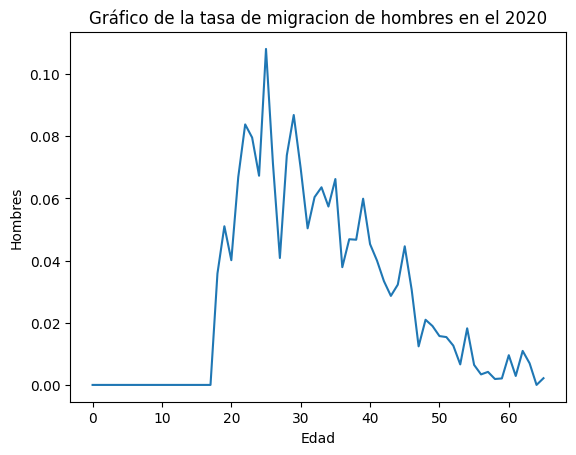

In [186]:
plt.plot(hombres_df_2020['edad'], tasa_2020['hombres'])
plt.xlabel('Edad')
plt.ylabel('Hombres')
plt.title('Gráfico de la tasa de migracion de hombres en el 2020')
plt.show()

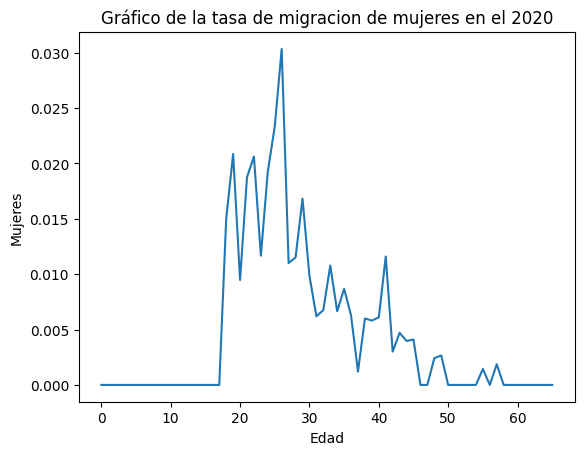

In [187]:
plt.plot(hombres_df_2020['edad'], tasa_2020['mujeres'])
plt.xlabel('Edad')
plt.ylabel('Mujeres')
plt.title('Gráfico de la tasa de migracion de mujeres en el 2020')
plt.show()

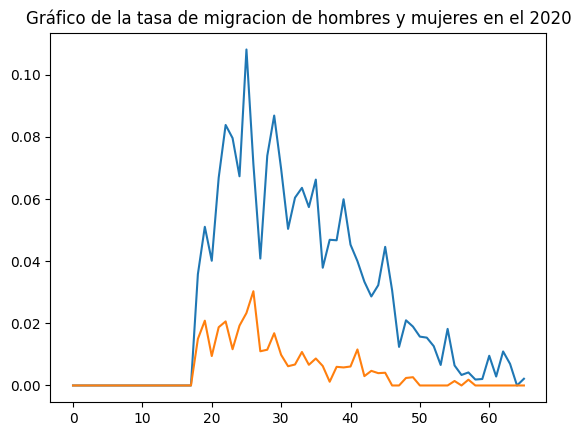

In [188]:
plt.plot(hombres_df_2020['edad'], tasa_2020['hombres'])
plt.plot(hombres_df_2020['edad'], tasa_2020['mujeres'])
plt.title('Gráfico de la tasa de migracion de hombres y mujeres en el 2020')
plt.show()

In [189]:
scaler = MinMaxScaler()
tasa_norm_2020 = scaler.fit_transform(tasa_2020)
tasa_norm_2020 = pd.DataFrame(tasa_norm_2020, columns=tasa_2020.columns)

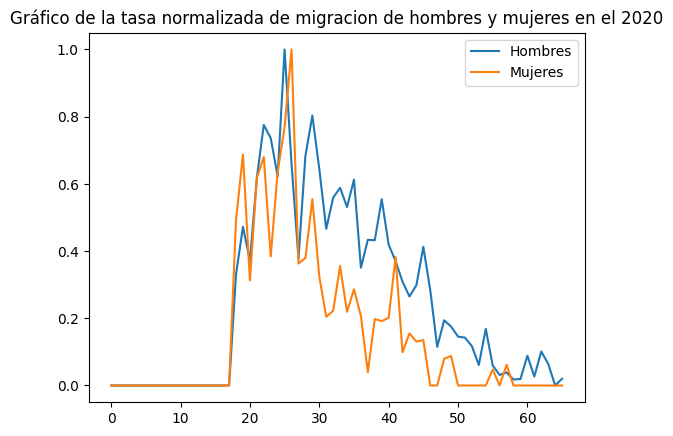

In [190]:
plt.plot(hombres_df_2020['edad'], tasa_norm_2020['hombres'],label="Hombres")
plt.plot(hombres_df_2020['edad'], tasa_norm_2020['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migracion de hombres y mujeres en el 2020')
plt.legend()
plt.show()

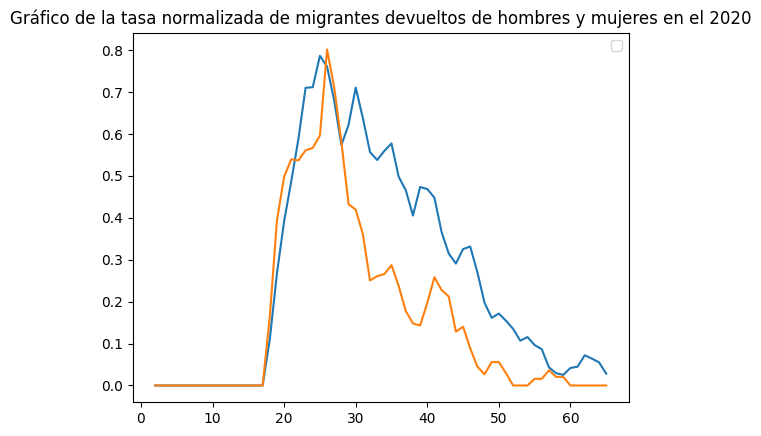

In [191]:
suavizada_hombres = tasa_norm_2020.rolling(window=3).mean()
plt.plot(hombres_df_2020['edad'], suavizada_hombres['hombres'])
suavizada_mujeres = tasa_norm_2020.rolling(window=3).mean()
plt.plot(hombres_df_2020['edad'], suavizada_mujeres['mujeres'])
plt.title('Gráfico de la tasa normalizada de migrantes devueltos de hombres y mujeres en el 2020')
plt.legend()
plt.show()

#EDAD Y SEXO CON SU TASA DE MIGRACIÓN 2022



In [192]:
# Los pasos hechos en esta parte, es lo mismo que se hizo para el año 2018, sería irrelevante agregar comentarios de la misma forma
# por ende, no serán agregados al menos que algo diferente se haya hecho
hombres_df_2022 = dev_2022.loc[(dev_2022["a1"] == 1) & (dev_2022["a2"] < 97), ["a2", "a1"]].value_counts().reset_index()
hombres_df_2022 = hombres_df_2022.loc[:, ["a2", 0]]
hombres_df_2022.columns = ["edad", "contar"]

mujeres_df_2022 = dev_2022.loc[(dev_2022["a1"] == 2) & (dev_2022["a2"] < 97), ["a2", "a1"]].value_counts().reset_index()
mujeres_df_2022 = mujeres_df_2022.loc[:, ["a2", 0]]
mujeres_df_2022.columns = ["edad", "contar"]

In [193]:
if hombres_df_2022["edad"].max() > mujeres_df_2022["edad"].max() :
    max_2022 = hombres_df_2022["edad"].max()
else:
    max_2022 = mujeres_df_2022["edad"].max()

max_2022=max_2022-1

In [194]:
rango_edades = set(range(0, max_2022+1))
edades_presentes = set(hombres_df_2022['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    hombres_df_2022.loc[len(hombres_df_2022)] = [edad, 0]
hombres_df_2022 = hombres_df_2022.sort_values("edad").reset_index(drop=True)

In [195]:
rango_edades = set(range(0, max_2022+1))
edades_presentes = set(mujeres_df_2022['edad'])
edades_faltantes = rango_edades - edades_presentes

for edad in edades_faltantes:
    mujeres_df_2022.loc[len(mujeres_df_2022)] = [edad, 0]
mujeres_df_2022 = mujeres_df_2022.sort_values("edad").reset_index(drop=True)

In [196]:
censo_2022 = censo
tasa_2022 = pd.DataFrame(columns=['hombres', 'mujeres'])
censo_2022 = censo_2022.replace(',', '', regex=True).astype('int64')
censo_2022 = censo_2022.iloc[0:max_2022+1]

In [197]:
tasa_2022["hombres"] = (hombres_df_2022["contar"]/censo_2022["Hombres"])*1000
tasa_2022["mujeres"] = (mujeres_df_2022["contar"]/censo_2022["Mujeres"])*1000
tasa_2022 = pd.concat([tasa_2022, hombres_df_2022["edad"]], axis=1)
tasa_2022["año"] = 2022
tasa_2022

,hombres,mujeres,edad,año
0,0.0,0.0,0,2022
1,0.0,0.0,1,2022
2,0.0,0.0,2,2022
3,0.0,0.0,3,2022
4,0.0,0.0,4,2022
...,...,...,...,...
75,0.0,0.0,75,2022
76,0.0,0.0,76,2022
77,0.0,0.0,77,2022
78,0.0,0.0,78,2022


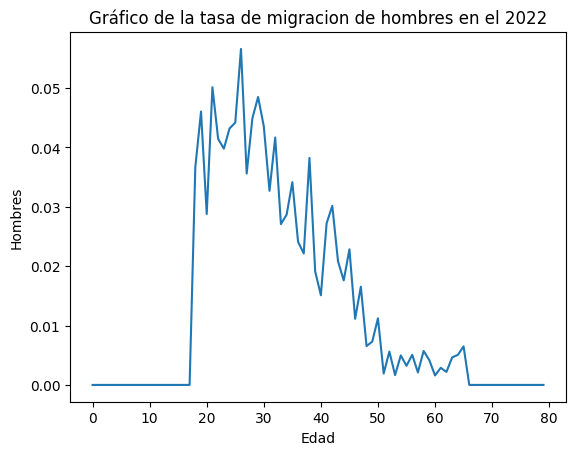

In [198]:
plt.plot(hombres_df_2022['edad'], tasa_2022['hombres'])
plt.xlabel('Edad')
plt.ylabel('Hombres')
plt.title('Gráfico de la tasa de migracion de hombres en el 2022')
plt.show()

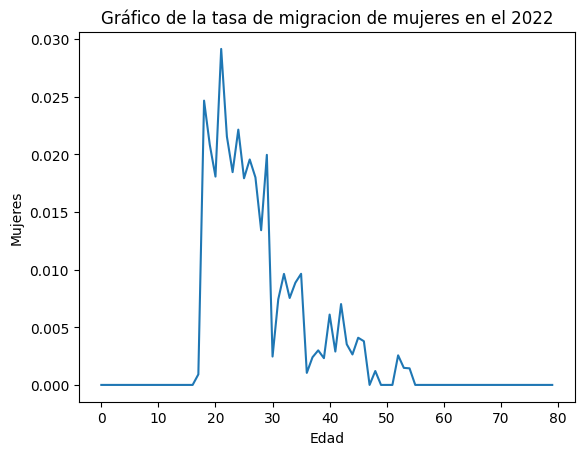

In [199]:
plt.plot(hombres_df_2022['edad'], tasa_2022['mujeres'])
plt.xlabel('Edad')
plt.ylabel('Mujeres')
plt.title('Gráfico de la tasa de migracion de mujeres en el 2022')
plt.show()

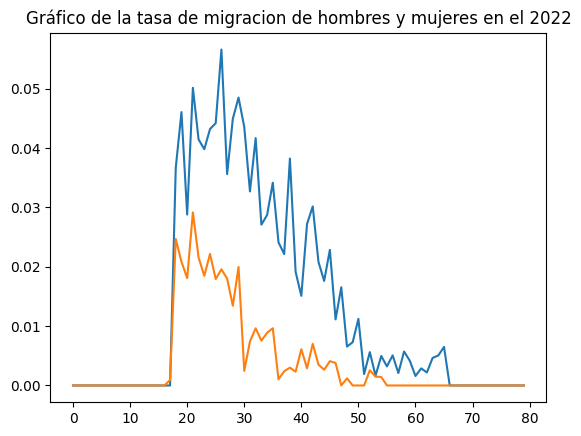

In [200]:
plt.plot(hombres_df_2022['edad'], tasa_2022['hombres'])
plt.plot(hombres_df_2022['edad'], tasa_2022['mujeres'])
plt.title('Gráfico de la tasa de migracion de hombres y mujeres en el 2022')
plt.show()

In [201]:
scaler = MinMaxScaler()
tasa_norm_2022 = scaler.fit_transform(tasa_2022)
tasa_norm_2022 = pd.DataFrame(tasa_norm_2022, columns=tasa_2022.columns)

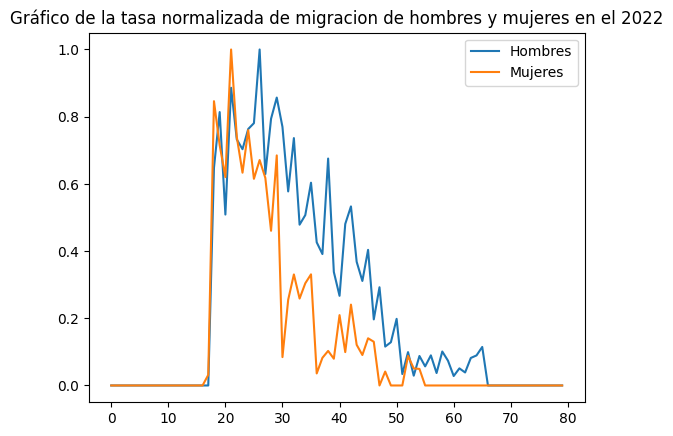

In [202]:
plt.plot(hombres_df_2022['edad'], tasa_norm_2022['hombres'],label="Hombres")
plt.plot(hombres_df_2022['edad'], tasa_norm_2022['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migracion de hombres y mujeres en el 2022')
plt.legend()
plt.show()

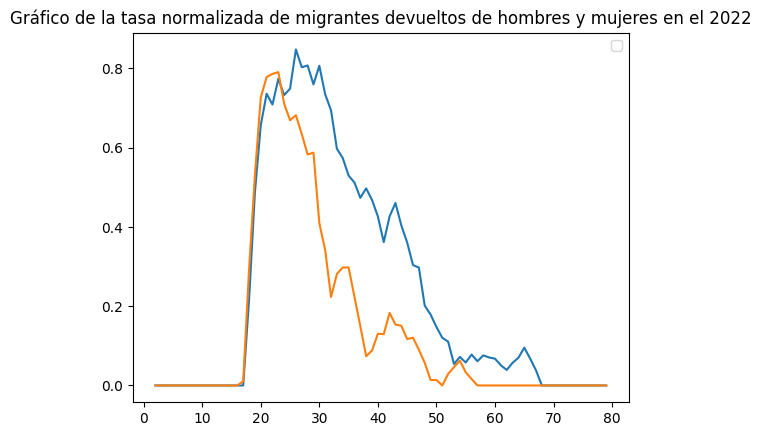

In [203]:
suavizada_hombres = tasa_norm_2022.rolling(window=3).mean()
plt.plot(hombres_df_2022['edad'], suavizada_hombres['hombres'])
suavizada_mujeres = tasa_norm_2022.rolling(window=3).mean()
plt.plot(hombres_df_2022['edad'], suavizada_mujeres['mujeres'])
plt.title('Gráfico de la tasa normalizada de migrantes devueltos de hombres y mujeres en el 2022')
plt.legend()
plt.show()

# PREDECIMOS LAS TASAS POST-PANDEMIA

In [204]:
# Derretir los dataframes "tasa_2018", "tasa_2019", "tasa_2020" y "tasa_2022" para convertir las columnas de "hombres" y "mujeres" en una sola columna llamada "sexo" y los valores de las tasas en una sola columna llamada "tasa_migracion"
tasa_1 = pd.melt(tasa_2018, id_vars=['edad', 'año'], var_name="sexo", value_name="tasa_migracion")
tasa_2 = pd.melt(tasa_2019, id_vars=['edad', 'año'], var_name="sexo", value_name="tasa_migracion")
tasa_3 = pd.melt(tasa_2020, id_vars=['edad', 'año'], var_name="sexo", value_name="tasa_migracion")
tasa_4 = pd.melt(tasa_2022, id_vars=['edad', 'año'], var_name="sexo", value_name="tasa_migracion")
# Concatenar los dataframes "tasa_1", "tasa_2", "tasa_3" y "tasa_4" en un único dataframe llamado "tasas"
tasas = pd.concat([tasa_1,tasa_2,tasa_3,tasa_4], axis=0)
# 1 son hombres, 2 son mujeres
tasas['sexo'] = tasas['sexo'].str.replace('hombres', "1")
tasas['sexo'] = tasas['sexo'].str.replace('mujeres', "2")

In [205]:
# Importamos la función "train_test_split" del módulo "model_selection" de la librería "sklearn"
from sklearn.model_selection import train_test_split
# Separamos las variables de entrada de la variable de salida
# "X" son las variables de entrada: "edad", "sexo" y "año"
# "y" es la variable de salida: "tasa_migracion"
X = tasas[['edad', 'sexo', 'año']]
y = tasas['tasa_migracion']
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
# "test_size=0.2" indica que el 20% de los datos se utilizarán para el conjunto de prueba y el 80% para el conjunto de entrenamiento
# "random_state=42" asegura que siempre se obtengan los mismos resultados al dividir los datos (se utiliza para fines de reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
from sklearn.ensemble import RandomForestRegressor
# Creamos un objeto "RandomForestRegressor" con los parámetros "n_estimators" y "random_state" especificados
# "n_estimators" es el número de árboles en el bosque aleatorio (se recomienda usar un valor alto para obtener mejores resultados)
# "random_state" asegura que siempre se obtengan los mismos resultados al entrenar el modelo (se utiliza para fines de reproducibilidad)
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Entrenamos el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [242]:
from sklearn.tree import export_graphviz
import graphviz

# Generar archivo .dot
dot_data = export_graphviz(model.estimators_[0], out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True,
                           precision=100)

# Visualizar archivo .dot
graph = graphviz.Source(dot_data)
graph.render("/content/gdrive/MyDrive/Ciencia de Datos/ASE/2023 (predicciones)/arbol_rf")

'/content/gdrive/MyDrive/Ciencia de Datos/ASE/2023 (predicciones)/arbol_rf.pdf'

In [207]:
# Realizamos una predicción utilizando el modelo entrenado y los datos de prueba
y_pred = model.predict(X_test)

In [208]:
# se crea un rango de 0 a 97 años
edades = list(range(0, 97))
sexos = ['1', '2']
año_estudio = [2023]
# Se crea una lista con todas las combinaciones de edad y sexo con año de estudio para poder obtener el df de predicciones del año 2023
data_2023 = []
for edad in edades:
    for sexo in sexos:
        for año in año_estudio:
            data_2023.append([edad, sexo, año])

# La lista se hace en un data frame
data_2023 = pd.DataFrame(data_2023, columns=['edad',"sexo","año"])
data_2023
# se usa el modelo
y_2023 = model.predict(data_2023)
data_2023["tasa_migracion"] = y_2023
data_2023

,edad,sexo,año,tasa_migracion
0,0,1,2023,0.000000
1,0,2,2023,0.000000
2,1,1,2023,0.000000
3,1,2,2023,0.000000
4,2,1,2023,0.000000
...,...,...,...,...
189,94,2,2023,0.000000
190,95,1,2023,0.000046
191,95,2,2023,0.000000
192,96,1,2023,0.000046


In [209]:
# Pivotamos el dataframe para obtener las tasas de migración separadas por sexo
data_2023 = data_2023.pivot_table(values='tasa_migracion', index=['edad', 'año'], columns=['sexo']).reset_index()

# Quitamos el nombre de la columna "sexo"
data_2023.columns.name = None

data_2023 = data_2023.rename(columns={'1': 'hombres'})
data_2023 = data_2023.rename(columns={'2': 'mujeres'})

# Mostramos el nuevo dataframe
data_2023

,edad,año,hombres,mujeres
0,0,2023,0.000000,0.0
1,1,2023,0.000000,0.0
2,2,2023,0.000000,0.0
3,3,2023,0.000000,0.0
4,4,2023,0.000000,0.0
...,...,...,...,...
92,92,2023,0.000046,0.0
93,93,2023,0.000046,0.0
94,94,2023,0.000046,0.0
95,95,2023,0.000046,0.0


In [210]:
# Se toma la precisión del algoritmo
print("Precisión del random forest: {:2f}".format(model.score(X_train,y_train)))
print("Precisión del random forest: {:.2f}".format(model.score(X_test,y_test)))

Precisión del random forest: 0.992363
Precisión del random forest: 0.96


In [234]:
from sklearn.tree import export_graphviz
import graphviz

# Generar archivo .dot
dot_data = export_graphviz(model.estimators_[0], out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualizar archivo .dot
graph = graphviz.Source(dot_data)
graph.render("/content/gdrive/MyDrive/Ciencia de Datos/ASE/2023 (predicciones)/arbol_rf")


'/content/gdrive/MyDrive/Ciencia de Datos/ASE/2023 (predicciones)/arbol_rf.pdf'

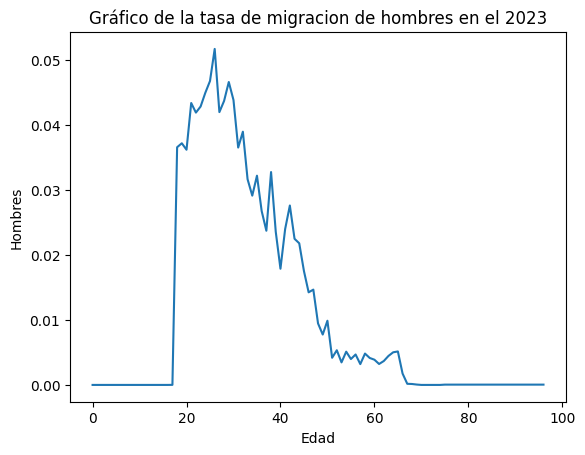

In [211]:
plt.plot(data_2023['edad'], data_2023['hombres'])
plt.xlabel('Edad')
plt.ylabel('Hombres')
plt.title('Gráfico de la tasa de migracion de hombres en el 2023')
plt.show()

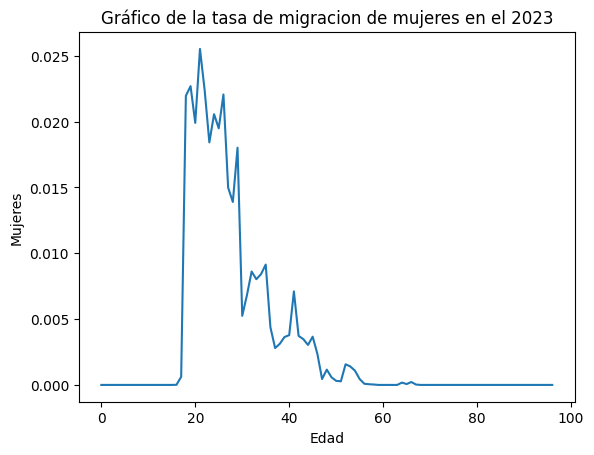

In [212]:
plt.plot(data_2023['edad'], data_2023['mujeres'])
plt.xlabel('Edad')
plt.ylabel('Mujeres')
plt.title('Gráfico de la tasa de migracion de mujeres en el 2023')
plt.show()

In [213]:
scaler = MinMaxScaler()
tasa_norm_2023 = scaler.fit_transform(data_2023)
tasa_norm_2023 = pd.DataFrame(tasa_norm_2023, columns=data_2023.columns)

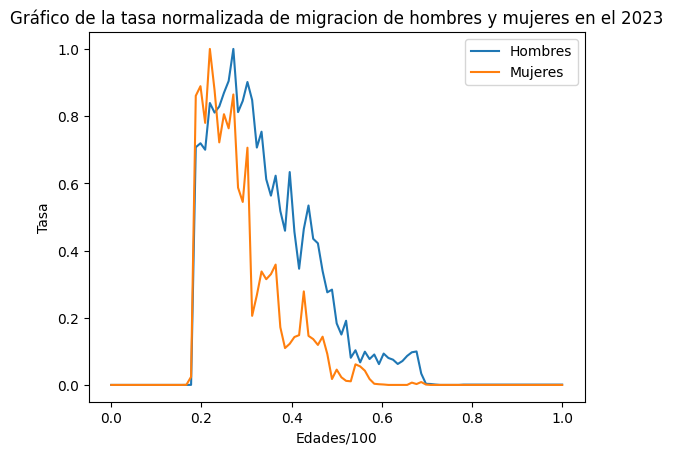

In [214]:
plt.plot(tasa_norm_2023['edad'], tasa_norm_2023['hombres'],label="Hombres")
plt.plot(tasa_norm_2023['edad'], tasa_norm_2023['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migracion de hombres y mujeres en el 2023')
plt.xlabel('Edades/100')
plt.ylabel('Tasa')
plt.legend()
plt.show()

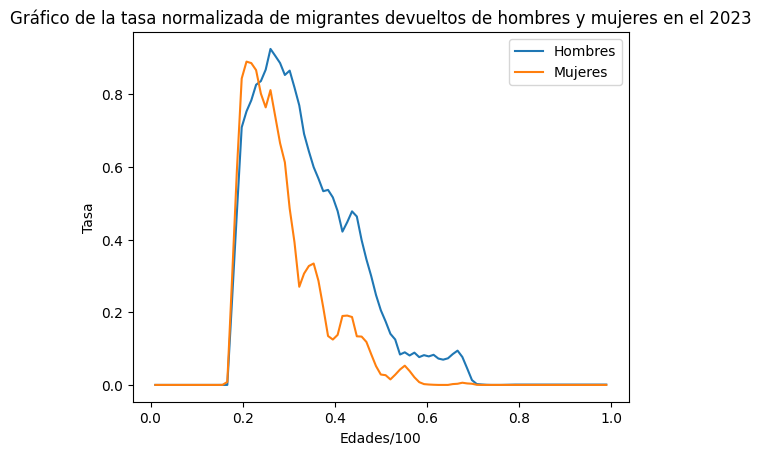

In [215]:
suavizada_hombres = tasa_norm_2023.rolling(window=3).mean()
plt.plot(suavizada_hombres['edad'], suavizada_hombres['hombres'],label="Hombres")
suavizada_mujeres = tasa_norm_2023.rolling(window=3).mean()
plt.plot(suavizada_mujeres['edad'], suavizada_mujeres['mujeres'],label="Mujeres")
plt.title('Gráfico de la tasa normalizada de migrantes devueltos de hombres y mujeres en el 2023')
plt.xlabel('Edades/100')
plt.ylabel('Tasa')
plt.legend()
plt.show()

# GRÁFICOS DE AYUDA, ESTA SECCIÓN SOLO ES PARA JUNTAR LOS GRÁFICOS QUE SE IRÁN USANDO A LO LARGO DEL ESCRITO

In [216]:
#variables de los data frames
#----dev_2018
#----dev_2019
#----dev_2020
#----dev_2022

Tabla del numero de migrantes devueltos

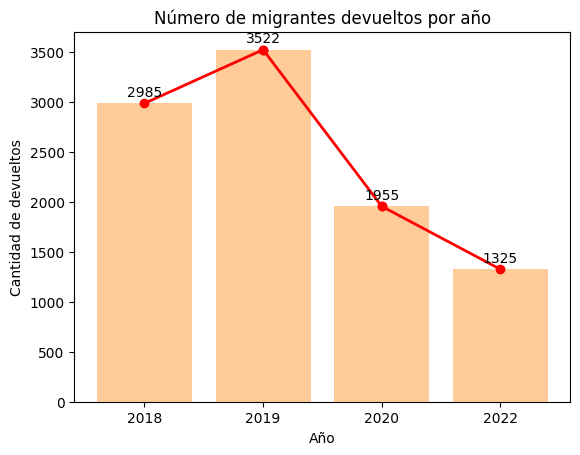

In [217]:
# Crear una lista con los nombres de los dataframes
nombres = ["2018","2019","2020","2022"]
# Crear una lista con las longitudes de los dataframes
longitudes = [len(dev_2018), len(dev_2019), len(dev_2020), len(dev_2022)]
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Crear las barras
ax.bar(nombres, longitudes, color='#FFCC99')
# Conectar las barras
for i in range(len(longitudes) - 1):
  ax.plot([nombres[i], nombres[i+1]], [longitudes[i], longitudes[i+1]], 'ro-', linewidth=2)
  # Agregar el número total en la parte superior de cada barra
for i, valor in enumerate(longitudes):
    ax.text(i, valor+75, valor, ha='center')

plt.xlabel('Año')
plt.ylabel('Cantidad de devueltos')
plt.title("Número de migrantes devueltos por año")
# Mostrar el gráfico
plt.show()

Gráfico de escolaridad

In [218]:
#Ordena el dataframe por edad y reinicia el índice
escolaridad_2018 = dev_2018.loc[(dev_2018["p3_1_1n"] >= -1) & (dev_2018["p3_1_1n"] <= 9) & (dev_2018["p3_1_1n"] != 0), ["p3_1_1n"]].value_counts().reset_index()
escolaridad_2018.columns = ["escolaridad","2018"]
escolaridad_2018 = escolaridad_2018.sort_values("escolaridad").reset_index(drop=True)

In [219]:
escolaridad_2019 = dev_2019.loc[(dev_2019["p3_1_1n"] >= -1) & (dev_2019["p3_1_1n"] <= 9) & (dev_2019["p3_1_1n"] != 0), ["p3_1_1n"]].value_counts().reset_index()
escolaridad_2019.columns = ["escolaridad","2019"]
escolaridad_2019 = escolaridad_2019.sort_values("escolaridad").reset_index(drop=True)

In [220]:
escolaridad_2020 = dev_2020.loc[(dev_2020["a3_1_1n"] >= -1) & (dev_2020["a3_1_1n"] <= 11) & (dev_2020["a3_1_1n"] != 0), ["a3_1_1n"]].value_counts().reset_index()
escolaridad_2020.columns = ["escolaridad","2020"]
escolaridad_2020 = escolaridad_2020.sort_values("escolaridad").reset_index(drop=True)

In [221]:
escolaridad_2022 = dev_2022.loc[(dev_2022["a3_1_1n"] >= -1) & (dev_2022["a3_1_1n"] <= 11) & (dev_2022["a3_1_1n"] != 0), ["a3_1_1n"]].value_counts().reset_index()
escolaridad_2022.columns = ["escolaridad","2022"]
escolaridad_2022 = escolaridad_2022.sort_values("escolaridad").reset_index(drop=True)

In [222]:
escolaridad = escolaridad_2018
escolaridad["2019"] =escolaridad_2019["2019"]
escolaridad["2020"] =escolaridad_2020["2020"]
escolaridad["2022"] =escolaridad_2022["2022"]
escolaridad = escolaridad.fillna(0)
escolaridad["escolaridad"] = escolaridad["escolaridad"].replace({-1:"No aprobó o cursó algún año de escuela",1:"Primaria",2:"Secundaria",3:"Preparatoria",4:"Escuela técnica con primaria",5:"Escuela técnica con secundaria o preparatoria",6:"Normal",7:"Profesional",8:"Maestría",9:"Doctorado"})
escolaridad

,escolaridad,2018,2019,2020,2022
0,No aprobó o cursó algún año de escuela,66,54.0,25.0,42.0
1,Primaria,668,681.0,291.0,206.0
2,Secundaria,1392,1746.0,971.0,579.0
3,Preparatoria,634,797.0,422.0,372.0
4,Escuela técnica con primaria,1,1.0,6.0,3.0
5,Escuela técnica con secundaria o preparatoria,9,10.0,15.0,7.0
6,Normal,3,8.0,3.0,6.0
7,Profesional,58,45.0,9.0,18.0
8,Maestría,1,0.0,0.0,0.0


In [223]:
# Transponemos el DataFrame y lo ordenamos por el índice
escolaridad = escolaridad.set_index('escolaridad').T.sort_index()

# Sumamos el número de estudiantes por cada año
escolaridad['total'] = escolaridad.sum(axis=1)

In [224]:
# Calculamos el porcentaje de estudiantes por cada combinación de contar y escolaridad
for column in ["No aprobó o cursó algún año de escuela","Primaria","Secundaria","Preparatoria","Escuela técnica con primaria","Escuela técnica con secundaria o preparatoria","Normal","Profesional","Maestría"]:
    escolaridad[column] = (escolaridad[column] / escolaridad['total']) * 100
# Seleccionamos solo las columnas de contar y escolaridad
escolaridad = escolaridad.iloc[:, 0:9]
escolaridad

escolaridad,No aprobó o cursó algún año de escuela,Primaria,Secundaria,Preparatoria,Escuela técnica con primaria,Escuela técnica con secundaria o preparatoria,Normal,Profesional,Maestría
2018,2.330508,23.587571,49.152542,22.387006,0.035311,0.317797,0.105932,2.048023,0.035311
2019,1.615799,20.377020,52.244165,23.847995,0.029922,0.299222,0.239378,1.346499,0.000000
2020,1.435132,16.704937,55.740528,24.225029,0.344432,0.861079,0.172216,0.516648,0.000000
2022,3.406326,16.707218,46.958637,30.170316,0.243309,0.567721,0.486618,1.459854,0.000000


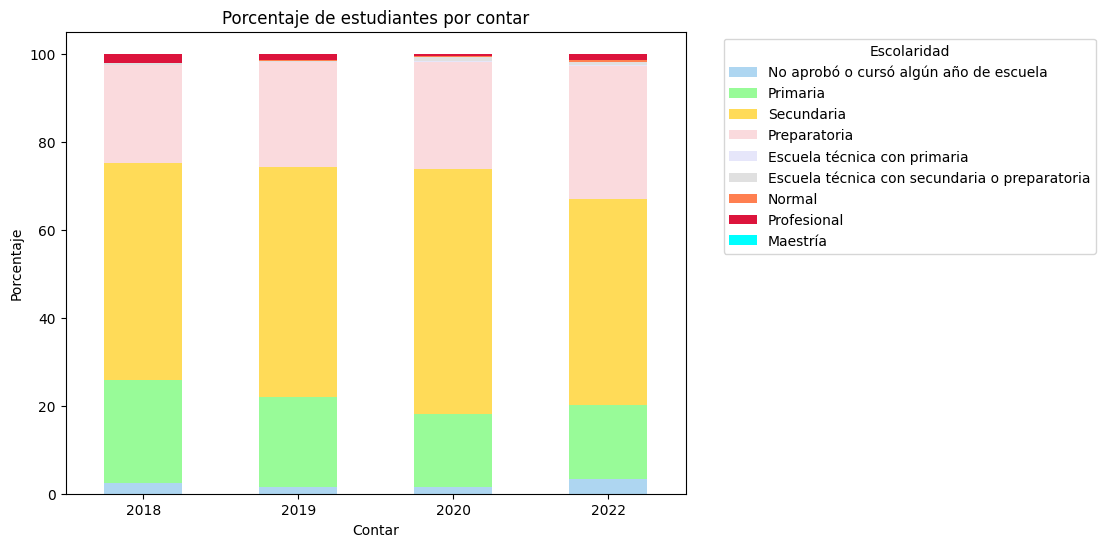

In [225]:
# Creamos la gráfica de barras apiladas de porcentaje con una sola barra y colores diferentes por segmento
ax = escolaridad.plot(kind='bar', stacked=True, 
                        color=["#AED6F1", "#98FB98", "#FFDB58", "#FADADD", "#E6E6FA", "#E0E0E0", "#FF7F50", "#DC143C", "#00FFFF"],
                        figsize=(8, 6))

# Añadimos un título, etiquetas de ejes y leyenda_
plt.title('Porcentaje de estudiantes por contar')
plt.xlabel('Contar')
plt.ylabel('Porcentaje')
plt.legend(title="Escolaridad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
# Mostramos la gráfica
plt.show()
